# Units and Quantities

## Objectives

- Use units
- Create functions that accept quantities as arguments
- Create new units

One of the most common problem in physics and the development of models are related to the conversion and management of physical units. This problem explained the crash of the probe on the Mars planet. In this episode, we will use *one* of the available library which can help you to avoid the same problem in your development.

We are going to learn at the same time, how to install a new library [astropy](http://docs.astropy.org/en/stable/index.html) which will give access to the [unit module](http://docs.astropy.org/en/stable/units/index.html).

## Installing a new python library

We can now install the *astropy* library using the same methof than for pyfits:

```bash
pip install astropy --user
```

After having successfully installed the astropy library, we can import the units modules:

In [1]:
from astropy import units as u


## Basics

How do we define a Quantity and which parts does it have?

In [2]:
# Define a quantity length
length = 26.2 * u.meter
# print it
print(length) # length is a quantityq

26.2 m


In [3]:
# Type of quantity
type(length)

astropy.units.quantity.Quantity

In [4]:
# Type of unit
type(u.meter)

astropy.units.core.IrreducibleUnit

In [5]:
# Quantity
length

<Quantity 26.2 m>

In [6]:
# value
length.value

26.2

In [7]:
# unit
length.unit

Unit("m")

In [8]:
# information
length.info

dtype = float64
unit = m
class = Quantity
n_bad = 0

Quantities can be converted to other units systems or factors by using the function: **to()**

In [9]:
# Convert it to: km, lyr
length.to(u.km)


<Quantity 0.0262 km>

In [10]:
length.to(u.lightyear)

<Quantity 2.76934219e-15 lyr>

We can do arithmetic operations when quantities have the compatible units:

In [11]:
# arithmetic with distances
distance_start = 10 * u.mm
distance_end = 23 * u.km
length = distance_end - distance_start
print(length)

22.99999 km


Quantities can also be combined, for example to measure speed

In [12]:
# calculate a speed
time = 15 * u.minute
speed = length / time
speed

<Quantity 1.53333267 km / min>

You can ask what is the *irreductible* unit of a quantities. Irreductibles in the sens of the basic one in the unit system of your choice.

In [13]:
# decompose it
speed.decompose()

<Quantity 25.55554444 m / s>

You can ask the result in a specific system by using methods. Here to have the value of the quantity *speed* in the SI system and in the CGS system.

In [14]:
speed.si

<Quantity 25.55554444 m / s>

In [15]:
speed.cgs

<Quantity 2555.55444444 cm / s>

**Warning**

There are no method for the imperial system and the unit need to be converted to it. In addition it is not imported by default and another step is asked to use it.
This system exist for historical reason and only three countries in the world are still using it as their official system. 

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li> Convert the speed in imperial units (miles/hour) using: <br>

 ```from astropy.units import imperial```
 </li>
 <li> Calculate whether a pint is more than half litre<br>
 
 <emph>You can compare quantities as comparing variables.</emph> <br>
 Something strange? Check what definition of <a href='https://en.wikipedia.org/wiki/Pint'>pint</a> astropy is using.
 </li>
 <li> Does units work with areas? calculate the area of a rectangle of 3 km of side and 5 meter of width. Show them in $m^2$ and convert them to $yards^2$</li>
</div>

### Answer challenge 1

In [16]:
from astropy.units import imperial
speed.to(imperial.mile/u.hour)

<Quantity 57.16612483 mi / h>

### Answer challenge 2

In [17]:
imperial.pint > 0.5 * u.l

False

The pint used in that library is the *US* pint which is 474 ml when the *UK* pint is 568 ml

### Answer challenge 3

In [18]:
rectangle_area = 3 * u.km * 5 * u.m
print(rectangle_area)
print(rectangle_area.decompose())
print(rectangle_area.to(imperial.yard ** 2))

15.0 km m
15000.0 m2
17939.8506945162 yd2


In [19]:
rectangle_area

<Quantity 15. km m>

The answer is correct but dot not give the proper unit. We should have $m^2$

In [20]:
rectangle_area.decompose()

<Quantity 15000. m2>

In [21]:
rectangle_area.to(imperial.yard ** 2)

<Quantity 17939.85069452 yd2>

In [22]:
rectangle_area = rectangle_area.decompose()

In [23]:
rectangle_area

<Quantity 15000. m2>

## Composed units

Many units are compositions of others, for example, one could create new combinationes for ease of use:

In [24]:
# create a composite unit centimeter per second
cms = u.cm / u.s
speed.to(cms)

<Quantity 2555.55444444 cm / s>

In [25]:
# and in the imperial system
mph = imperial.mile / u.hour
speed.to(mph)

<Quantity 57.16612483 mi / h>

and others are already a composition:

In [26]:
# what can be converted from s-1?
(u.s ** -1).compose()

[Unit("Bq"), Unit("Hz"), Unit("2.7027e-11 Ci")]

In [27]:
# or Jules?
(u.joule).compose()


[Unit("J"), Unit("1e+07 erg"), Unit("4.58742e+17 Ry"), Unit("6.24151e+18 eV")]

Sometime we get *no units* quantitites

In [28]:
# no units
nounits = 20. * u.cm / (1. * u.m)
nounits

<Quantity 20. cm / m>

What happen if we add a number to this?

In [29]:
# arithmetic with no units
nounits + 3

<Quantity 3.2>

In [30]:
# final value of a no unit quantity
nounits.decompose() # It's a unitless quantity


<Quantity 0.2>

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li> Create the ```uk_pint``` composite unit.
 </li>
 Hint: Pint(UK) = 0.568261485 litre
 <li>Convert the value of the US imperial pint to the UK imperial pint.
 </li>
 </div>

In [31]:
uk_pint = 0.568261485 * u.l

In [32]:
imperial.pint.to(uk_pint)

0.8326738414121169

## Equivalencies

Some conversions are not done by a conversion factor as between miles and kilometers, for example converting between wavelength and frequency.

# TODO add temperature and meter

In [33]:
# converting spectral quantities
(656.281 * u.nm).to(u.Hz) # Fails because they are not compatible

UnitConversionError: 'nm' (length) and 'Hz' (frequency) are not convertible

# Equivalent unit

There are units which can be converted in other unit which seems not convertible. For example, it is possible to convert meters in Hertz. At first glance it can be seems to be wrong but if you know that the quantities are wavelength and frequencies it is indeed a valid conversion:

$\lambda = \frac{c}{\nu}$

Where:


- $lambda \sim m$ 
- $c \sim \frac{m}{s}$
- $\nu \sim Hz \sim s^{-1}$

In [34]:
(656.281 * u.nm).to(u.Hz)

UnitConversionError: 'nm' (length) and 'Hz' (frequency) are not convertible

but doing it right

In [35]:
(656.281 * u.nm).to(u.Hz, equivalencies=u.spectral())

<Quantity 4.56805024e+14 Hz>

## Other built-in equivalencies are: 
 - Doppler (`dopplr_radio`, `doppler_optical`, `doppler_relativistic`)
 - spectral flux density
 - temperature
 - brigthness temperature
 - temperature energy
 - and you can [build your own](http://astropy.readthedocs.org/en/stable/units/equivalencies.html#writing-new-equivalencies)

finding the equivalencies

In [36]:
u.Hz.find_equivalent_units()

  Primary name | Unit definition | Aliases     
[
  Bq           | 1 / s           | becquerel    ,
  Ci           | 3.7e+10 / s     | curie        ,
  Hz           | 1 / s           | Hertz, hertz ,
]

but also using other systems

In [37]:
u.Hz.find_equivalent_units(equivalencies=u.spectral())

  Primary name | Unit definition        | Aliases                         
[
  AU           | 1.49598e+11 m          | au, astronomical_unit            ,
  Angstrom     | 1e-10 m                | AA, angstrom                     ,
  Bq           | 1 / s                  | becquerel                        ,
  Ci           | 3.7e+10 / s            | curie                            ,
  Hz           | 1 / s                  | Hertz, hertz                     ,
  J            | kg m2 / s2             | Joule, joule                     ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg                          ,
  cm           | 0.01 m                 | centimeter                       ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt                     ,
  earthRad     | 6.3781e+06 m           | R_earth, Rearth                  ,
  erg          | 1e-07 kg m2 / s2       |                                  ,
  jupiterRad   | 7.1492e+07 m           | R_jup, Rjup, R_jupiter, Rjupiter ,

## Arrays

Quantities can also be applied to arrays

In [38]:
# different ways of defining a quantity for a single value
length = 44 * u.m
time = u.Quantity(23, u.s)
speed = length / time
speed

<Quantity 1.91304348 m / s>

In [39]:
# now with lists
length_list = [1, 2, 3] * u.m

# and arrays
import numpy as np
time_array = np.array([1, 2, 3]) * u.s

# and its arithmetics
length_list / time_array

<Quantity [1., 1., 1.] m / s>

In [40]:
# angles are smart!
#angle = u.Quantity(np.arange(180), u.deg)

angle = np.arange(180) * u.deg

print(angle[[0, -1]])
print(np.sin(angle[[0, -1]]))

[  0. 179.] deg
[0.         0.01745241]


## Plotting quantities

To work nicely with matplotlib we need to do as follows:

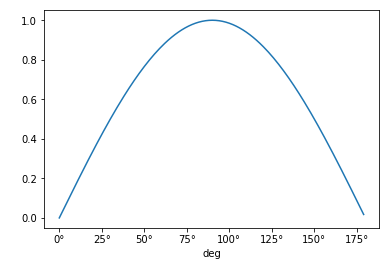

In [41]:
# allowing for plotting
from astropy.visualization import quantity_support
quantity_support()

# loading matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

# Ploting the previous array
plt.plot(angle, np.sin(angle))

**note**

Temperature have a peculiar behaviour and it not possible to add them without asking to convert to a common unit.


In [51]:
t1 = 0 * u.deg_C
t2 = 22 * u.K
t3 = 32 * imperial.Fahrenheit


In [52]:
t1 + t2

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

In [53]:
t1 + t3.to(u.deg_C, equivalencies=u.temperature())

<Quantity 0. deg_C>

In [49]:
t1.to(u.K, equivalencies=u.temperature()) + t2

<Quantity 295.15 K>